# Testing the earlier established loop condition for the solutions from $10^5$ runs.
* Main aim: show a positive correlation between error and the objective function value
* Show it for the same 4 'vicinity' of order param.
* Have the indexes, open files accordingly and do the computations.

In [3]:
%run "elegant_plot.ipynb" 
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

import re
from Helper_Files.result_section_perfect_loops_hlpr1 import hlpr_fun
import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
cmap = cmaps.viridis

Populating the interactive namespace from numpy and matplotlib


In [6]:
fig_save_path = r"\\storage01.amolf.nl\data\AMOLF\users\singh\Martin"\
                r"\Evolutionary Design\Thesis Chapter\Chapter 2.0\Figures\Section 9"

In [4]:
def angle_between(p1, p2):
    """
    Calculates the angle between two vectors from 
    Arguments:
    p1, p2 -- two vectors
    
    Returns:
    angle
    """
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

In [5]:
def mapping_func(alpha, a1, a2, a3, a4):
    """
    Maps the input angle alpha on the output
    angle beta. See Fig. 1.6, main text.
    
    Arguments:
    alpha  -- input angle range
    a1..a4 -- bar lengths of the four bars
    
    Returns:
    beta   -- range of the output angle 
    """
    A = np.sin(alpha)
    B = (a4/a1) - np.cos(alpha)
    C = -(a4/a3)*np.cos(alpha) + (a1**2 - a2**2 + a3**2 + a4**2)/(2*a1*a3) 
        
    #print((A + np.sqrt(A**2 + B**2 - C**2))/(B+C))
    beta = 2*np.arctan((A + np.sqrt(A**2 + B**2 - C**2))/(B+C))
    beta[beta < 0]+=2*np.pi
    #print(beta)
    return(beta)

In [6]:
# Get min_index_arr of n_best solutions
data_dir       =  r"\\storage01.amolf.nl\data\AMOLF\users\singh\Lisa PSO Runs\Order Parameter Study\100000 Runs\Data"
best_cost_grid =  np.load(data_dir + r"\Data\best_cost_grid.npy")

n_best = 100               # considering the top 5 best solutions. 6 because one of the files is corrupted
def smallestN_indices(a, N):
    idx = a.ravel().argsort()[:N]
    return np.stack(np.unravel_index(idx, a.shape)).T

min_index_arr = smallestN_indices(best_cost_grid, n_best)

In [7]:
# Load data 
data_dir       =  r"\\storage01.amolf.nl\data\AMOLF\users\singh\Lisa PSO Runs\Order Parameter Study\100000 Runs\Data"
order_param    =  np.load(data_dir + r"\Data\order_param_r2.npy")
best_cost_grid =  np.load(data_dir + r"\Data\best_cost_grid.npy")

Number of solutions that have (order_param < 0.0) & (order_param > 4e-2): 270
0.54568544924 -0.896193766116
Number of solutions that have (order_param < 0.1-1e-2) & (order_param > 0.1+1e-2): 690
0.453637194947 -1.11664321836
Number of solutions that have (order_param < 0.5-1e-3) & (order_param > 0.5+1e-3): 180
0.385439830828 -1.13648033826
Number of solutions that have (order_param < 1-1e-3) & (order_param > 1+1e-3): 131
0.301447977427

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:53: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:53: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


 -1.34094148553


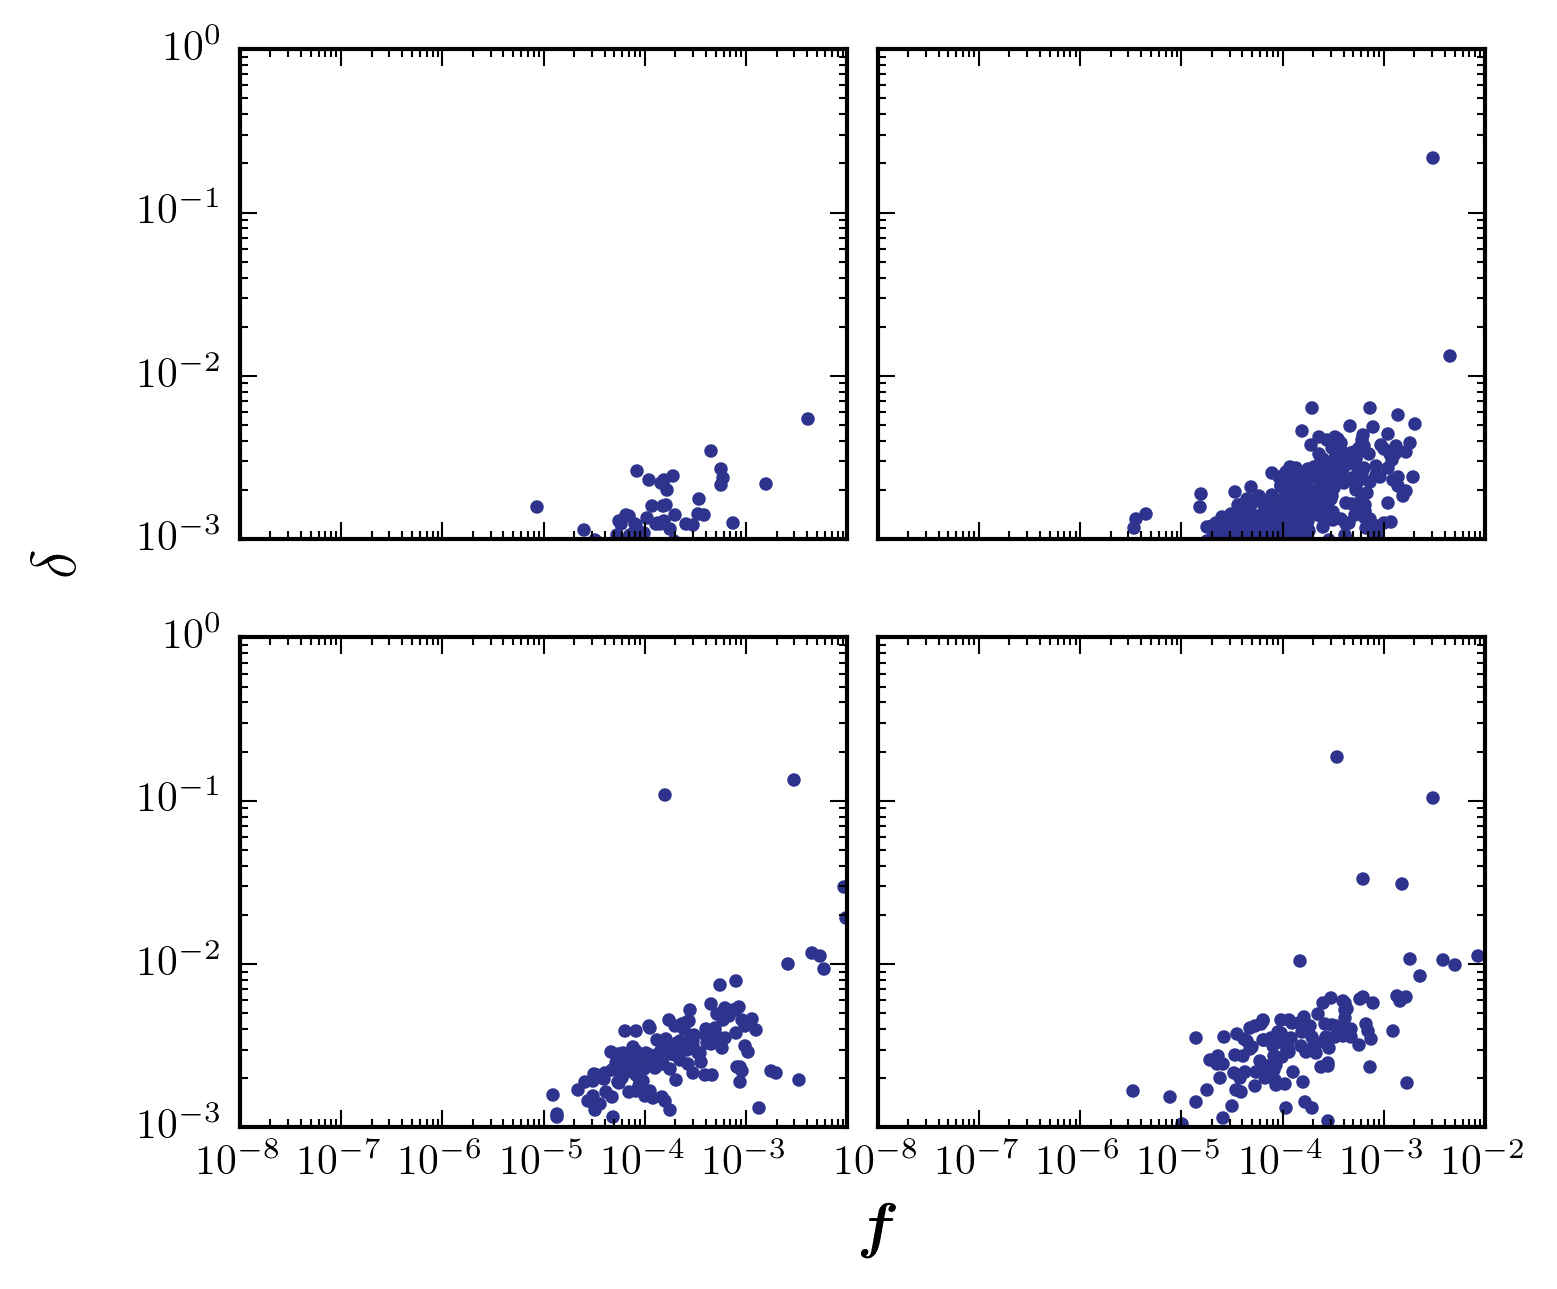

In [30]:
r_vals = [[0.0, 4e-2],[0.1-1e-2, 0.1+1e-2],[0.50-1e-3, 0.5+1e-3],[1-1e-3,1+1e-3]]
r_vals_str = [['0.0', '4e-2'],['0.1-1e-2', '0.1+1e-2'],['0.5-1e-3', '0.5+1e-3'],['1-1e-3', '1+1e-3']]

import scipy.stats as stats


f = fullfig(hf = 2.0)
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
plt.subplots_adjust(wspace=0.05)

ax_list = [ax1, ax2, ax3, ax4]
for ax in ax_list:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([1e-8, 1e-2])
    ax.set_ylim([1e-3, 1e-0])

#ax1.set_xlim(0.0, 4e-2); ax1.set_xticks([0.0, 4e-2]); ax1.set_xticklabels(['0.0',r'$4\times10^{2}$'])
ax4.set_xlabel(r'$\boldsymbol{f}$', size = 15); ax1.yaxis.set_label_coords(-0.25, -0.05)
#ax2.set_xlim(0.1-1e-2, 0.1+1e-2)
ax2.set_yticklabels([])#; ax2.set_xticks([0.1, 0.1+1e-2])
ax1.set_xticklabels([]); ax2.set_xticklabels([])
#; ax2.set_xticklabels(['0.1',r'$0.1+10^{-2}$'])
#ax3.set_xlim(0.5-1e-3, 0.5+1e-3); 
ax3.set_xticks([1e-8, 1e-7,1e-6, 1e-5, 1e-4, 1e-3]); 
# ax3.set_xticklabels([r'$0.5-10^{-3}$', r'$0.5+10^{-3}$']) 
#ax4.set_xlim(1.0-1e-3, 1.0+1e-3) 
ax4.set_yticklabels([]);
# ax4.set_xticks([1.0, 1.0+1e-3]); ax4.set_xticklabels([r'1.0', r'$1.0+10^{-3}$'])                          
ax1.set_ylabel(r'$\delta$', size = 15); ax4.xaxis.set_label_coords(0.0, -0.15)     


#ax1.plot([1e-6, 1e-3],[0.3*10**(0.47)*1e-6**(0.42), 0.3*10**(0.47)*1e-3**(0.42)], color = 'k', linewidth = 1)
#ax1.text(1e-5, 4e-3, '0.42', size = 7)
#ax2.plot([1e-6, 1e-3],[0.35*10**(0.20)*1e-6**(0.35), 0.35*10**(0.20)*1e-3**(0.35)], color = 'k', linewidth = 1)
#ax2.text(1e-5, 5e-3, '0.35', size = 7)
#ax3.plot([1e-6, 1e-3],[0.3*10**(0.40)*1e-6**(0.37), 0.3*10**(0.40)*1e-3**(0.37)], color = 'k', linewidth = 1)
#ax3.text(1e-5, 5e-3, '0.37', size = 7)
#ax4.plot([1e-5, 1e-3],[0.5*10**(-0.024)*1e-5**(0.24), 0.5*10**(0.-0.024)*1e-3**(0.24)], color = 'k', linewidth = 1)
#ax4.text(1e-4, 3e-2, '0.24', size = 7)

for r_counter in range(4):
        obj_func_val = []
        error = []
        
        r_low_lim = r_vals[r_counter][0]; r_high_lim = r_vals[r_counter][1] 
        norm = mpl.colors.LogNorm(vmin=r_low_lim, vmax=r_high_lim)
        
        idx_inTup = np.where((order_param >r_low_lim) & (order_param < r_high_lim)) 
        num_sol   = len(order_param[(order_param > r_low_lim) & (order_param < r_high_lim)])
        print('Number of solutions that have (order_param < {0})'.format(r_vals_str[r_counter][0]), 
              r'& (order_param > {0}):'.format(r_vals_str[r_counter][1]), num_sol)

        idx_inArr = np.zeros((num_sol, 3), dtype = int64)
        
        for i in range(num_sol):
            idx_inArr[i,0] = idx_inTup[0][i]
            idx_inArr[i,1] = idx_inTup[1][i]
            idx_inArr[i,2] = idx_inTup[2][i] 
        
        for jCounter in range(num_sol):
            i_ = idx_inArr[jCounter, 0]
            j_ = idx_inArr[jCounter, 1]
            k_ = idx_inArr[jCounter, 2]
    
            Position = np.zeros((12, 2))

            str_ = "%02d"%(i_)
            file = data_dir + '\RunPso_c{0}_s{1}_r'.format("%02d"%(25*k_), "%02d"%(175+25*j_))+str_
            fp = open(file)
    
            for j, line in enumerate(fp):
                      if(j >= 3415 and j<= 3426):
                        test = re.split(r'\t+', line)
                        Position[j-3415,0] = float(test[0])
                        Position[j-3415,1] = float(test[1])
            tiling = Position / 4  
            
            # Loop1: The bar lengths
            a11 = np.linalg.norm(tiling[1] - tiling[9])
            a21 = np.linalg.norm(tiling[1] - tiling[0])
            a31 = np.linalg.norm(tiling[0] - tiling[8])
            a41 = np.linalg.norm(tiling[8] - tiling[9])


            # Loop2: The bar lengths
            a12 = np.linalg.norm(tiling[7] - tiling[8])
            a22 = np.linalg.norm(tiling[7] - tiling[6])
            a32 = np.linalg.norm(tiling[6] - tiling[11])
            a42 = np.linalg.norm(tiling[8] - tiling[11])


            # Loop3: The bar lengths
            a13 = np.linalg.norm(tiling[11] - tiling[5])
            a23 = np.linalg.norm(tiling[5] - tiling[4])
            a33 = np.linalg.norm(tiling[4] - tiling[10])
            a43 = np.linalg.norm(tiling[10] - tiling[11])


            # Loop4: The bar lengths
            a14 = np.linalg.norm(tiling[10] - tiling[3])
            a24 = np.linalg.norm(tiling[3] - tiling[2])
            a34 = np.linalg.norm(tiling[9] - tiling[2])
            a44 = np.linalg.norm(tiling[10] - tiling[9])

            
            

            #------------------------CHANGED ON 30/03/2018-----------------------------------
            #--------------PURPOSE: TO CHECK LINEARIZED LOOP CONDITION AROUND THETA = 0------
            #---------------REPRODUCE THE FIGURE BY UNCOMMENTING THESE STATEMENTS------------
            #pos_vec_left_deformed = hlpr_fun(tiling, -np.pi/3)

            #vec1 =  pos_vec_left_deformed[0,0,:] - pos_vec_left_deformed[1,2,:]
            #vec2 =  pos_vec_left_deformed[3,3,:] - pos_vec_left_deformed[1,2,:]
            #alpha1_max = angle_between(vec2, vec1)

            #pos_vec_right_deformed = hlpr_fun(tiling, np.pi/3)
            #vec1 =  pos_vec_right_deformed[0,0,:] - pos_vec_right_deformed[1,2,:]
            #vec2 =  pos_vec_right_deformed[3,3,:] - pos_vec_right_deformed[1,2,:]
            #alpha1_min = angle_between(vec2, vec1)
            #alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180
            #---------------------------------------------------------------------------------
            
            pos_vec_deformed = hlpr_fun(tiling, 0)
            vec1 =  pos_vec_deformed[0,0,:] - pos_vec_deformed[1,2,:]
            vec2 =  pos_vec_deformed[3,3,:] - pos_vec_deformed[1,2,:]
            alpha1  = angle_between(vec2, vec1)
            alpha1_max = alpha1 + 1
            alpha1_min = alpha1 - 1
            alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180
            
            
            Delta1 = angle_between(tiling[1]-tiling[9],tiling[2]-tiling[9]); Delta2 = angle_between(tiling[10]-tiling[9],tiling[8]-tiling[9])
            Delta3 = angle_between(tiling[7]-tiling[8],tiling[0]-tiling[8]); Delta4 = angle_between(tiling[9]-tiling[8],tiling[11]-tiling[8])
            Delta5 = angle_between(tiling[5]-tiling[11],tiling[6]-tiling[11]); Delta6 = angle_between(tiling[8]-tiling[11],tiling[10]-tiling[11])
            Delta7 = angle_between(tiling[3]-tiling[10],tiling[4]-tiling[10]); Delta8 = angle_between(tiling[11]-tiling[10],tiling[9]-tiling[10])

            alpha2  = 2*np.pi - (Delta3 + Delta4)*np.pi/180  - mapping_func(alpha1, a11, a21, a31, a41)
            #print(mapping_func(alpha1, a11, a21, a31, a41)*90/np.pi)
            alpha3  = 2*np.pi - (Delta5 + Delta6)*np.pi/180  - mapping_func(alpha2, a12, a22, a32, a42)
            #print(mapping_func(alpha1, a12, a22, a32, a42)*90/np.pi)
            alpha4  = 2*np.pi - (Delta7 + Delta8)*np.pi/180  - mapping_func(alpha3, a13, a23, a33, a43)
            #print(mapping_func(alpha1, a13, a23, a33, a43)*90/np.pi)
            alpha1_ = 2*np.pi - (Delta1 + Delta2)*np.pi/180  - mapping_func(alpha4, a14, a24, a34, a44)
            #print(mapping_func(alpha1, a14, a24, a34, a44)*90/np.pi)
            
            # remove the nans
            alpha1  = alpha1[~np.isnan(alpha1_)]
            alpha1_ = alpha1_[~np.isnan(alpha1_)]
            
            # rescaling..
            #alpha1 = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            #alpha1_ = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            alpha1   = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            alpha1_  = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            
            
            error.append(np.linalg.norm(alpha1 - alpha1_))
            obj_func_val.append(best_cost_grid[i_, j_, k_])
        
        ax = ax_list[r_counter]
        
        ax.scatter(asarray(obj_func_val), asarray(error), color = '#2E348E', s = 5 )
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(asarray(obj_func_val)), np.log10(asarray(error)))
        print(slope, intercept)
        
        

#plt.savefig(fig_save_path + r"\loop_condition_error.pdf".format(r_counter), format='pdf',bbox_inches='tight')  


In [11]:
pos_vec_left_deformed = hlpr_fun(tiling, np.pi/3)

vec1 =  pos_vec_left_deformed[0,0,:] - pos_vec_left_deformed[1,2,:]
vec2 =  pos_vec_left_deformed[3,3,:] - pos_vec_left_deformed[1,2,:]
alpha1_max = angle_between(vec2, vec1)
print(alpha1_max)

71.1782200695


C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


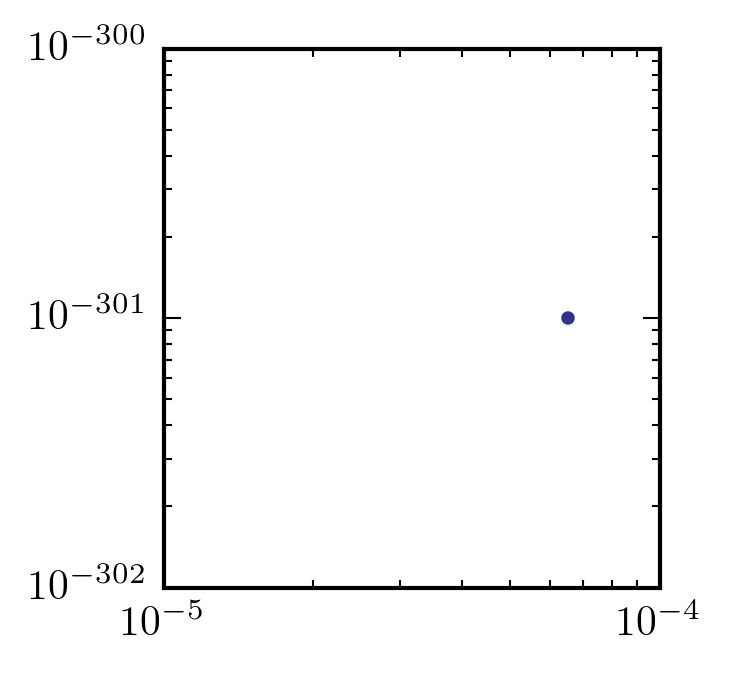

In [44]:
halffig()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(asarray(obj_func_val), asarray(error), color = '#2E348E', s = 5 )
#plt.ylim(1e-3, 1e0)

obj_func_val = asarray(obj_func_val)
error        = asarray(error)

In [32]:
error

array([ 0.06717712,  0.        ,  0.13085275,  0.09248986,  0.02344703,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.05771047,  0.15007038,  0.        ,  0.0531952 ,  0.        ,
        0.05965517,  0.08896191,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.07859987,  0.05011968,  0.        ,
        0.15359451,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.05015786,  0.        ,  0.04622564,
        0.12838138,  0.        ,  0.        ,  0.        ,  0.        ,
        0.06962252,  0.        ,  0.        ,  0.        ,  0.        ,
        0.06966535,  0.        ,  0.04737456,  0.        ,  0.        ,
        0.        ,  0.08910174,  0.        ,  0.        ,  0.        ,
        0.        ,  0.13568467,  0.        ,  0.        ,  0.05675145,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.07552158,  0.        ,  0.  

In [37]:
asarray(error)

array([ 0.07100556,  0.10660455,  0.14226964,  0.08174944,  0.04213434,
        0.19825481,  0.04713871,  0.0993918 ,  0.06828235,  0.07484277,
        0.07074903,  0.13806956,  0.17012832,  0.06837328,  0.07767624,
        0.06760203,  0.10363977,  0.60382455,  0.10639017,  0.13244738,
        0.0940747 ,  0.15782275,  0.07874381,  0.06273665,  0.14760882,
        0.12588425,  0.08053834,  0.09179804,  0.13310332,  0.10429748,
        0.41854724,  0.06997161,  0.0501166 ,  0.12059808,  0.05899738,
        0.15009012,  0.11787791,  0.13247818,  0.13203664,  0.1794207 ,
        0.08136405,  0.12261048,  0.04966861,  0.21365312,  0.48567761,
        0.05002629,  0.13261298,  0.04706682,  0.37893257,  0.08655832,
        0.12783616,  0.09423635,  0.12618585,  0.13682284,  0.06919374,
        0.14523081,  0.13696272,  0.04709151,  0.40245396,  0.06234296,
        0.13337689,  0.22107463,  0.0761002 ,  0.30817574,  0.08728414,
        0.16592046,  0.1911692 ,  0.09428691,  0.079989  ,  0.13

In [50]:
print(alpha1)
print((alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min()))

[ 1.38794653  1.43068933  1.47343214  1.51617494  1.55891774  1.60166054
  1.64440335  1.68714615  1.72988895  1.77263175  1.81537456  1.85811736
  1.90086016  1.94360297  1.98634577  2.02908857  2.07183137  2.11457418
  2.15731698  2.20005978  2.24280258  2.28554539  2.32828819  2.37103099
  2.41377379  2.4565166   2.4992594   2.5420022   2.58474501  2.62748781
  2.67023061  2.71297341  2.75571622  2.79845902  2.84120182  2.88394462
  2.92668743  2.96943023  3.01217303  3.05491583  3.09765864  3.14040144
  3.18314424  3.22588705  3.26862985  3.31137265  3.35411545  3.39685826
  3.43960106  3.48234386]
[ 0.          0.02040816  0.04081633  0.06122449  0.08163265  0.10204082
  0.12244898  0.14285714  0.16326531  0.18367347  0.20408163  0.2244898
  0.24489796  0.26530612  0.28571429  0.30612245  0.32653061  0.34693878
  0.36734694  0.3877551   0.40816327  0.42857143  0.44897959  0.46938776
  0.48979592  0.51020408  0.53061224  0.55102041  0.57142857  0.59183673
  0.6122449   0.63265306  

In [52]:
print(alpha1_)
print((alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min()))

[ 1.39557246  1.43189045  1.46949281  1.50821312  1.54790177  1.5884247
  1.62966215  1.67150734  1.71386525  1.75665138  1.79979062  1.84321621
  1.88686875  1.93069529  1.97464857  2.01868622  2.0627701   2.10686573
  2.15094171  2.19496924  2.23892172  2.28277433  2.32650372  2.37008775
  2.41350527  2.45673592  2.49976012  2.542559    2.58511449  2.62740957
  2.66942853  2.71115751  2.75258514  2.79370353  2.83450942  2.87500585
  2.91520422  2.95512707  2.99481187  3.03431609  3.07372472  3.11316128
  3.15280551  3.19292323  3.23392119  3.27645909  3.32171393  3.37216469
  3.43524107         nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan]


# <font color='red '> ==============================================</font>
# <font color='red '>TESTING SECTION TESTING SECTION TESTING SECTION. </font>
# <font color='red '> ==============================================</font>

\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25\RunPso_c00_s350_r42.out
[0.50602033940501057]
\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25\RunPso_c75_s125_r31.out
[0.50602033940501057, 0.002641227915132566]


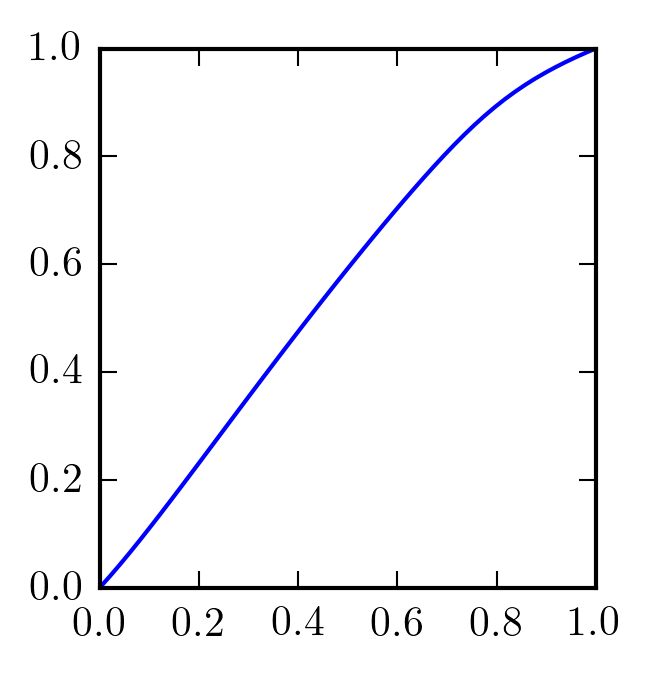

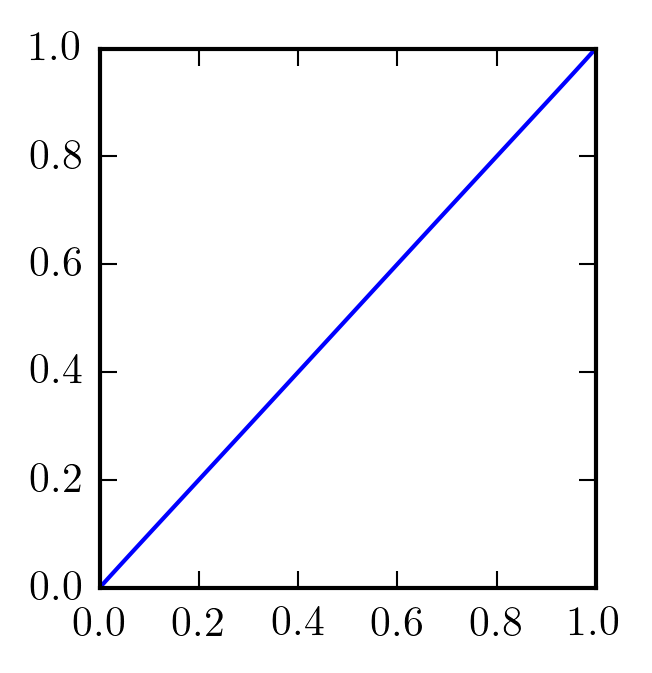

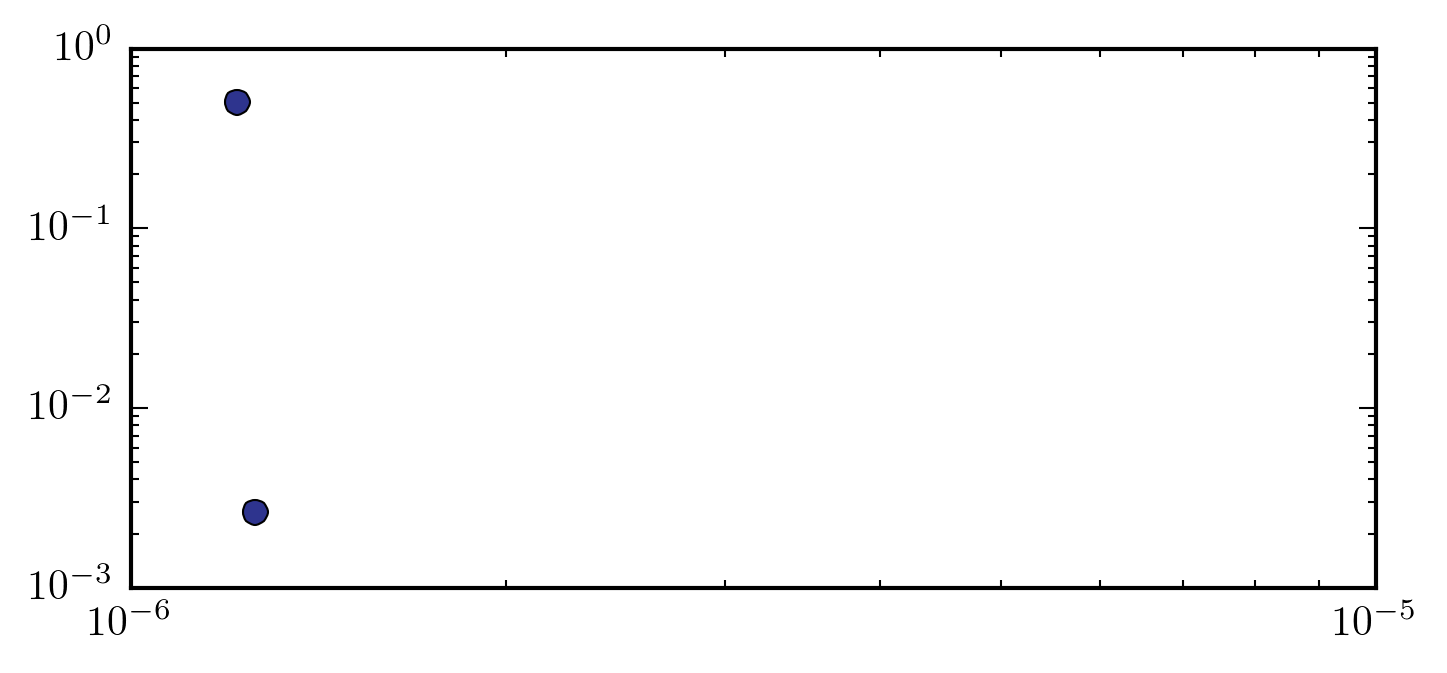

In [80]:
best_cost_grid = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function"\
                         r"\Horizontal Target Curve\Weight - 0.25\Data\best_cost_grid.npy")
best_cost_grid_copy = np.copy(best_cost_grid)
min_index_arr = np.zeros((24,3), dtype = int)

error = []
obj_func_val = []

for count in range(24):
    i,j,k = np.where(best_cost_grid_copy == best_cost_grid_copy.min())
    best_cost_grid_copy[i , j, k] = 1000
    min_index_arr[count, 0] = i[0] 
    min_index_arr[count, 1] = j[0]
    min_index_arr[count, 2] = k[0]

   
for count in range(22,24):
       
            i_ = min_index_arr[count, 0]
            j_ = min_index_arr[count, 1]
            k_ = min_index_arr[count, 2]
            Tiling = np.zeros((12, 2))

            data_dir = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"\
                    r"\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25"

            str_ = "%02d"%(i_)
            file = data_dir + '\RunPso_c{0}_s{1}_r'.format("%02d"%(25*k_), "%02d"%(25*j_))+str_+'.out'
            print(file)
            fp = open(file)
            for j, line in enumerate(fp):
                 if(j >= 153415 and j<= 153426):
                    test = re.split(r'\t+', line)
                    Tiling[j-153415,0] = float(test[0])
                    Tiling[j-153415,1] = float(test[1])
                
            tiling = Tiling/4
            # Loop1: The bar lengths
            a11 = np.linalg.norm(tiling[1] - tiling[9])
            a21 = np.linalg.norm(tiling[1] - tiling[0])
            a31 = np.linalg.norm(tiling[0] - tiling[8])
            a41 = np.linalg.norm(tiling[8] - tiling[9])


            # Loop2: The bar lengths
            a12 = np.linalg.norm(tiling[7] - tiling[8])
            a22 = np.linalg.norm(tiling[7] - tiling[6])
            a32 = np.linalg.norm(tiling[6] - tiling[11])
            a42 = np.linalg.norm(tiling[8] - tiling[11])


            # Loop3: The bar lengths
            a13 = np.linalg.norm(tiling[11] - tiling[5])
            a23 = np.linalg.norm(tiling[5] - tiling[4])
            a33 = np.linalg.norm(tiling[4] - tiling[10])
            a43 = np.linalg.norm(tiling[10] - tiling[11])


            # Loop4: The bar lengths
            a14 = np.linalg.norm(tiling[10] - tiling[3])
            a24 = np.linalg.norm(tiling[3] - tiling[2])
            a34 = np.linalg.norm(tiling[9] - tiling[2])
            a44 = np.linalg.norm(tiling[10] - tiling[9])


            pos_vec_left_deformed = hlpr_fun(tiling, -np.pi/3)

            vec1 =  pos_vec_left_deformed[0,0,:] - pos_vec_left_deformed[1,2,:]
            vec2 =  pos_vec_left_deformed[3,3,:] - pos_vec_left_deformed[1,2,:]
            alpha1_max = angle_between(vec2, vec1)

            pos_vec_right_deformed = hlpr_fun(tiling, np.pi/3)
            vec1 =  pos_vec_right_deformed[0,0,:] - pos_vec_right_deformed[1,2,:]
            vec2 =  pos_vec_right_deformed[3,3,:] - pos_vec_right_deformed[1,2,:]
            alpha1_min = angle_between(vec2, vec1)

            alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180

            Delta1 = angle_between(tiling[1]-tiling[9],tiling[2]-tiling[9]); Delta2 = angle_between(tiling[10]-tiling[9],tiling[8]-tiling[9])
            Delta3 = angle_between(tiling[7]-tiling[8],tiling[0]-tiling[8]); Delta4 = angle_between(tiling[9]-tiling[8],tiling[11]-tiling[8])
            Delta5 = angle_between(tiling[5]-tiling[11],tiling[6]-tiling[11]); Delta6 = angle_between(tiling[8]-tiling[11],tiling[10]-tiling[11])
            Delta7 = angle_between(tiling[3]-tiling[10],tiling[4]-tiling[10]); Delta8 = angle_between(tiling[11]-tiling[10],tiling[9]-tiling[10])

            alpha2  = 2*np.pi - (Delta3 + Delta4)*np.pi/180  - mapping_func(alpha1, a11, a21, a31, a41)
            #print(mapping_func(alpha1, a11, a21, a31, a41)*90/np.pi)
            alpha3  = 2*np.pi - (Delta5 + Delta6)*np.pi/180  - mapping_func(alpha2, a12, a22, a32, a42)
            #print(mapping_func(alpha1, a12, a22, a32, a42)*90/np.pi)
            alpha4  = 2*np.pi - (Delta7 + Delta8)*np.pi/180  - mapping_func(alpha3, a13, a23, a33, a43)
            #print(mapping_func(alpha1, a13, a23, a33, a43)*90/np.pi)
            alpha1_ = 2*np.pi - (Delta1 + Delta2)*np.pi/180  - mapping_func(alpha4, a14, a24, a34, a44)
            #print(mapping_func(alpha1, a14, a24, a34, a44)*90/np.pi)
            
            # remove the nans
            alpha1  = alpha1[~np.isnan(alpha1_)]
            alpha1_ = alpha1_[~np.isnan(alpha1_)]
            
            # rescaling..
            #alpha1 = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            #alpha1_ = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            alpha1   = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            alpha1_  = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            
            
            error.append(np.linalg.norm(alpha1 - alpha1_))
            print(error)
            obj_func_val.append(best_cost_grid[i_, j_, k_])
            
            halffig()
            plt.plot((alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min()), (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min()))
        #ax = ax_list[r_counter]
        
fullfig()        
plt.loglog(asarray(obj_func_val), asarray(error), 'o',color = '#2E348E')
#slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(asarray(obj_func_val)), np.log10(asarray(error)))
#print(slope, intercept)
        
        

#plt.savefig(fig_save_path + r"\loop_condition_error.pdf".format(r_counter), format='pdf',bbox_inches='tight')  


# Hoepfully the last figure !

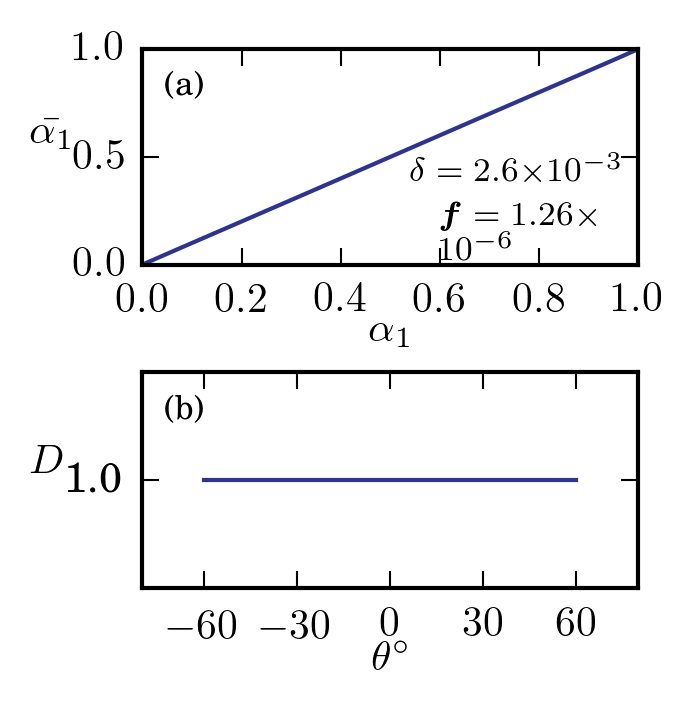

In [112]:
halffig()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.50)
file = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25\RunPso_c75_s125_r31.out"

fp = open(file)
for j, line in enumerate(fp):
     if(j >= 153415 and j<= 153426):
        test = re.split(r'\t+', line)
        Tiling[j-153415,0] = float(test[0])
        Tiling[j-153415,1] = float(test[1])

tiling = Tiling/4
# Loop1: The bar lengths
a11 = np.linalg.norm(tiling[1] - tiling[9])
a21 = np.linalg.norm(tiling[1] - tiling[0])
a31 = np.linalg.norm(tiling[0] - tiling[8])
a41 = np.linalg.norm(tiling[8] - tiling[9])


# Loop2: The bar lengths
a12 = np.linalg.norm(tiling[7] - tiling[8])
a22 = np.linalg.norm(tiling[7] - tiling[6])
a32 = np.linalg.norm(tiling[6] - tiling[11])
a42 = np.linalg.norm(tiling[8] - tiling[11])


# Loop3: The bar lengths
a13 = np.linalg.norm(tiling[11] - tiling[5])
a23 = np.linalg.norm(tiling[5] - tiling[4])
a33 = np.linalg.norm(tiling[4] - tiling[10])
a43 = np.linalg.norm(tiling[10] - tiling[11])


# Loop4: The bar lengths
a14 = np.linalg.norm(tiling[10] - tiling[3])
a24 = np.linalg.norm(tiling[3] - tiling[2])
a34 = np.linalg.norm(tiling[9] - tiling[2])
a44 = np.linalg.norm(tiling[10] - tiling[9])


pos_vec_left_deformed = hlpr_fun(tiling, -np.pi/3)

vec1 =  pos_vec_left_deformed[0,0,:] - pos_vec_left_deformed[1,2,:]
vec2 =  pos_vec_left_deformed[3,3,:] - pos_vec_left_deformed[1,2,:]
alpha1_max = angle_between(vec2, vec1)

pos_vec_right_deformed = hlpr_fun(tiling, np.pi/3)
vec1 =  pos_vec_right_deformed[0,0,:] - pos_vec_right_deformed[1,2,:]
vec2 =  pos_vec_right_deformed[3,3,:] - pos_vec_right_deformed[1,2,:]
alpha1_min = angle_between(vec2, vec1)

alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180

Delta1 = angle_between(tiling[1]-tiling[9],tiling[2]-tiling[9]); Delta2 = angle_between(tiling[10]-tiling[9],tiling[8]-tiling[9])
Delta3 = angle_between(tiling[7]-tiling[8],tiling[0]-tiling[8]); Delta4 = angle_between(tiling[9]-tiling[8],tiling[11]-tiling[8])
Delta5 = angle_between(tiling[5]-tiling[11],tiling[6]-tiling[11]); Delta6 = angle_between(tiling[8]-tiling[11],tiling[10]-tiling[11])
Delta7 = angle_between(tiling[3]-tiling[10],tiling[4]-tiling[10]); Delta8 = angle_between(tiling[11]-tiling[10],tiling[9]-tiling[10])

alpha2  = 2*np.pi - (Delta3 + Delta4)*np.pi/180  - mapping_func(alpha1, a11, a21, a31, a41)
#print(mapping_func(alpha1, a11, a21, a31, a41)*90/np.pi)
alpha3  = 2*np.pi - (Delta5 + Delta6)*np.pi/180  - mapping_func(alpha2, a12, a22, a32, a42)
#print(mapping_func(alpha1, a12, a22, a32, a42)*90/np.pi)
alpha4  = 2*np.pi - (Delta7 + Delta8)*np.pi/180  - mapping_func(alpha3, a13, a23, a33, a43)
#print(mapping_func(alpha1, a13, a23, a33, a43)*90/np.pi)
alpha1_ = 2*np.pi - (Delta1 + Delta2)*np.pi/180  - mapping_func(alpha4, a14, a24, a34, a44)
#print(mapping_func(alpha1, a14, a24, a34, a44)*90/np.pi)

error.append(np.linalg.norm(alpha1[~np.isnan(alpha1_)] - alpha1_[~np.isnan(alpha1_)]))
obj_func_val.append(best_cost_grid[i_, j_, k_])

ax1.plot((alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min()), (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min()), color = '#2E348E')
ax1.set_yticks([0.0, 0.5, 1.0])
ax1.set_xlabel(r"$\alpha_1$", labelpad = -1); ax1.set_ylabel(r"$\bar{\alpha_1}$", rotation = 0)
ax1.text(0.54, 0.40, r'$\delta = 2.6\times$''$10^{-3}$', size = 8)
ax1.text(0.60, 0.02, r'$\boldsymbol{f} = 1.26\times$''\n''$10^{-6}$', size = 8)

ax2.plot([-60, 60],[1,1], color = '#2E348E')
ax2.set_xlim([-80,80])
ax2.set_yticks([1.0]); ax2.set_yticklabels(['1.0'])
ax2.set_xticks([-60, -30, 0, 30, 60])
ax2.set_xlabel(r"$\theta^{\circ}$", labelpad = -1); ax2.set_ylabel(r"$D$", rotation = 0)


subplotlabel('(a)', 'upper left', ax=ax1, size = 8)
subplotlabel('(b)', 'upper left', ax=ax2, size = 8)

plt.savefig(fig_save_path + r"\prop_mapping.pdf".format(r_counter), format='pdf',bbox_inches='tight')  

# TESTING || TESTING || TESTING || TESTING || TESTING || 

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountere

1.00097767661
0.500991298066
0.109938219938
0.0398690216678


C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:143: RuntimeWarning: invalid value encountered in less


C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


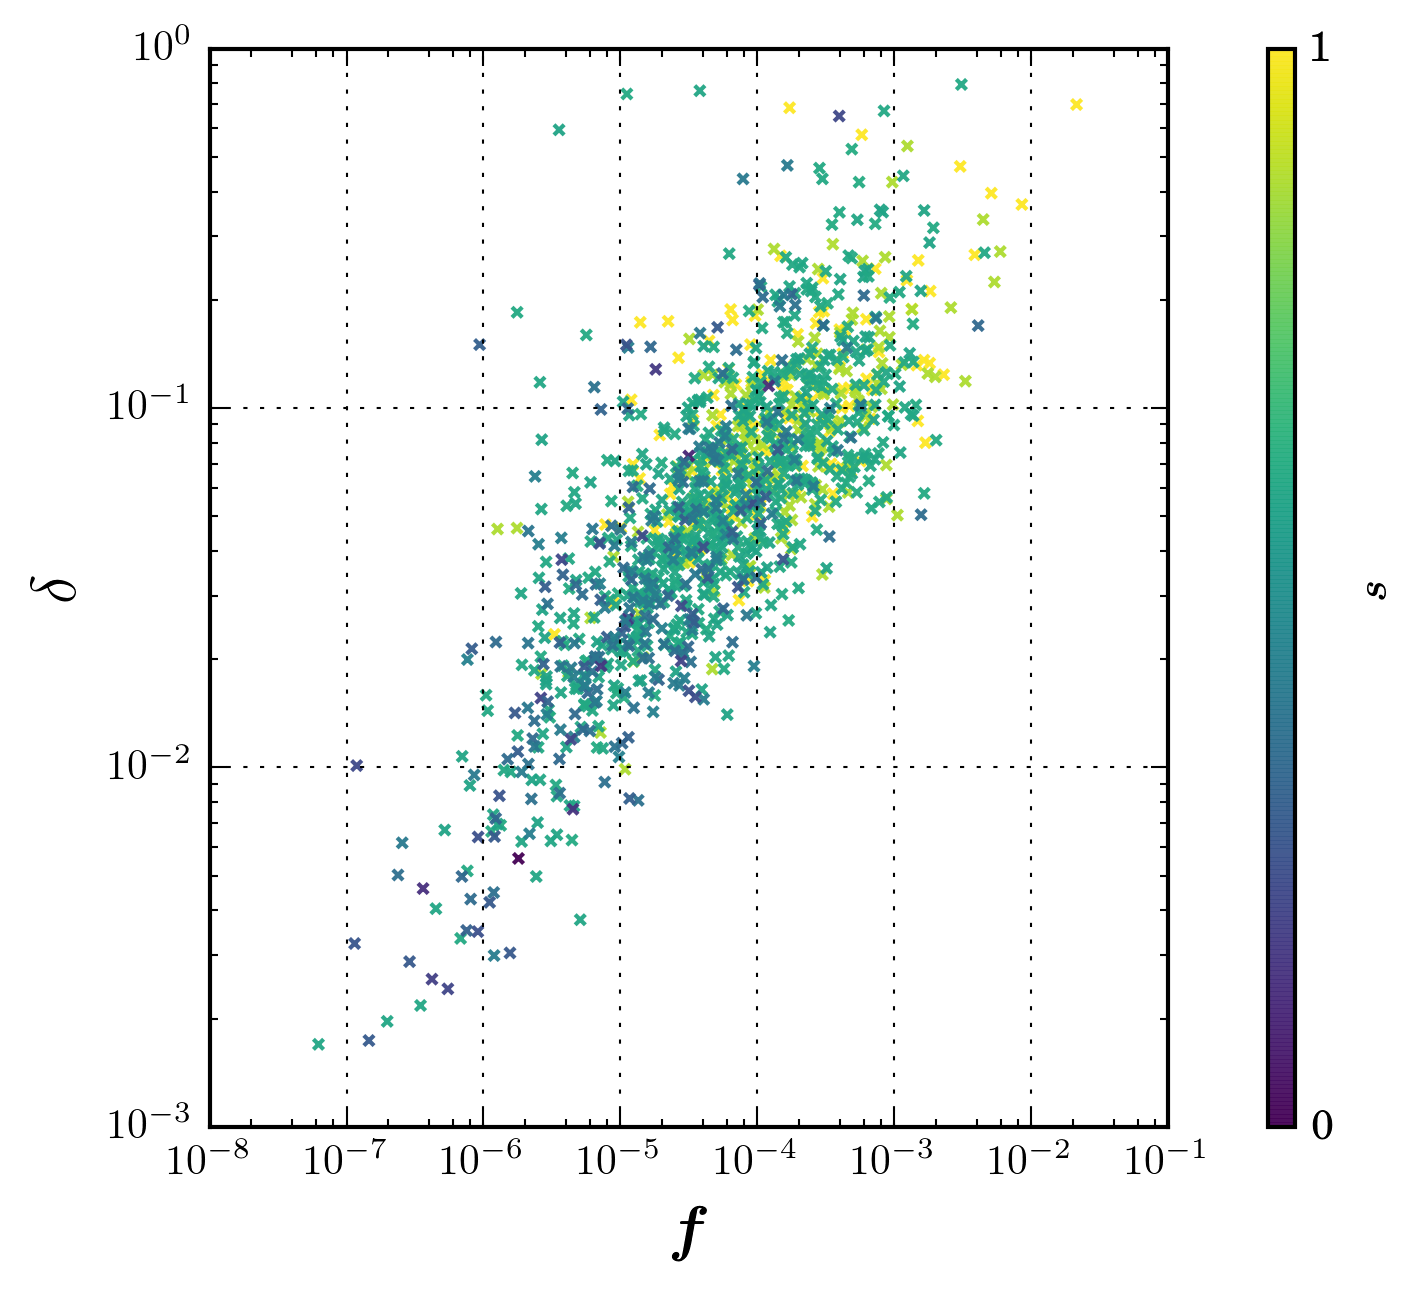

In [12]:
r_vals = [[0.0, 4e-2],[0.1-1e-2, 0.1+1e-2],[0.50-1e-3, 0.5+1e-3],[1-1e-3,1+1e-3]]
r_vals_str = [['0.0', '4e-2'],['0.1-1e-2', '0.1+1e-2'],['0.5-1e-3', '0.5+1e-3'],['1-1e-3', '1+1e-3']]

import scipy.stats as stats


f = fullfig(hf = 2.0)


ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

clr = ['r', 'g', 'b', 'skyblue']
norm = mpl.colors.LogNorm(vmin=3.31e-3, vmax=1)

for r_counter in [3,2,1,0]:
#for r_counter in [3]:
        obj_func_val = []
        error = []
        
        r_low_lim = r_vals[r_counter][0]; r_high_lim = r_vals[r_counter][1] 
        #norm = mpl.colors.LogNorm(vmin=r_low_lim, vmax=r_high_lim)
        
        idx_inTup = np.where((order_param >r_low_lim) & (order_param < r_high_lim)) 
        num_sol   = len(order_param[(order_param > r_low_lim) & (order_param < r_high_lim)])
        #print('Number of solutions that have (order_param < {0})'.format(r_vals_str[r_counter][0]), 
        #      r'& (order_param > {0}):'.format(r_vals_str[r_counter][1]), num_sol)
        print(order_param[(order_param > r_low_lim) & (order_param < r_high_lim)].max())
        
        idx_inArr = np.zeros((num_sol, 3), dtype = int64)
        
        for i in range(num_sol):
            idx_inArr[i,0] = idx_inTup[0][i]
            idx_inArr[i,1] = idx_inTup[1][i]
            idx_inArr[i,2] = idx_inTup[2][i] 
        
        for jCounter in range(num_sol):
            i_ = idx_inArr[jCounter, 0]
            j_ = idx_inArr[jCounter, 1]
            k_ = idx_inArr[jCounter, 2]
    
            Position = np.zeros((12, 2))

            str_ = "%02d"%(i_)
            file = data_dir + '\RunPso_c{0}_s{1}_r'.format("%02d"%(25*k_), "%02d"%(175+25*j_))+str_
            fp = open(file)
    
            for j, line in enumerate(fp):
                      if(j >= 3415 and j<= 3426):
                        test = re.split(r'\t+', line)
                        Position[j-3415,0] = float(test[0])
                        Position[j-3415,1] = float(test[1])
            tiling = Position / 4  
            
            # Loop1: The bar lengths
            a11 = np.linalg.norm(tiling[1] - tiling[9])
            a21 = np.linalg.norm(tiling[1] - tiling[0])
            a31 = np.linalg.norm(tiling[0] - tiling[8])
            a41 = np.linalg.norm(tiling[8] - tiling[9])


            # Loop2: The bar lengths
            a12 = np.linalg.norm(tiling[7] - tiling[8])
            a22 = np.linalg.norm(tiling[7] - tiling[6])
            a32 = np.linalg.norm(tiling[6] - tiling[11])
            a42 = np.linalg.norm(tiling[8] - tiling[11])


            # Loop3: The bar lengths
            a13 = np.linalg.norm(tiling[11] - tiling[5])
            a23 = np.linalg.norm(tiling[5] - tiling[4])
            a33 = np.linalg.norm(tiling[4] - tiling[10])
            a43 = np.linalg.norm(tiling[10] - tiling[11])


            # Loop4: The bar lengths
            a14 = np.linalg.norm(tiling[10] - tiling[3])
            a24 = np.linalg.norm(tiling[3] - tiling[2])
            a34 = np.linalg.norm(tiling[9] - tiling[2])
            a44 = np.linalg.norm(tiling[10] - tiling[9])

            
            

            #------------------------CHANGED ON 30/03/2018-----------------------------------
            #--------------PURPOSE: TO CHECK LINEARIZED LOOP CONDITION AROUND THETA = 0------
            #---------------REPRODUCE THE FIGURE BY UNCOMMENTING THESE STATEMENTS------------
            #pos_vec_left_deformed = hlpr_fun(tiling, -np.pi/3)

            #vec1 =  pos_vec_left_deformed[0,0,:] - pos_vec_left_deformed[1,2,:]
            #vec2 =  pos_vec_left_deformed[3,3,:] - pos_vec_left_deformed[1,2,:]
            #alpha1_max = angle_between(vec2, vec1)

            #pos_vec_right_deformed = hlpr_fun(tiling, np.pi/3)
            #vec1 =  pos_vec_right_deformed[0,0,:] - pos_vec_right_deformed[1,2,:]
            #vec2 =  pos_vec_right_deformed[3,3,:] - pos_vec_right_deformed[1,2,:]
            #alpha1_min = angle_between(vec2, vec1)
            #alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180
            #---------------------------------------------------------------------------------
            
            pos_vec_deformed = hlpr_fun(tiling, 0)
            vec1 =  pos_vec_deformed[0,0,:] - pos_vec_deformed[1,2,:]
            vec2 =  pos_vec_deformed[3,3,:] - pos_vec_deformed[1,2,:]
            alpha1  = angle_between(vec2, vec1); #print(alpha1)
            alpha1_max = alpha1 + 60
            alpha1_min = alpha1 - 60
            alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180
            
            
            Delta1 = angle_between(tiling[1]-tiling[9],tiling[2]-tiling[9]); Delta2 = angle_between(tiling[10]-tiling[9],tiling[8]-tiling[9])
            Delta3 = angle_between(tiling[7]-tiling[8],tiling[0]-tiling[8]); Delta4 = angle_between(tiling[9]-tiling[8],tiling[11]-tiling[8])
            Delta5 = angle_between(tiling[5]-tiling[11],tiling[6]-tiling[11]); Delta6 = angle_between(tiling[8]-tiling[11],tiling[10]-tiling[11])
            Delta7 = angle_between(tiling[3]-tiling[10],tiling[4]-tiling[10]); Delta8 = angle_between(tiling[11]-tiling[10],tiling[9]-tiling[10])

            alpha2  = 2*np.pi - (Delta3 + Delta4)*np.pi/180  - mapping_func(alpha1, a11, a21, a31, a41)
            #print(mapping_func(alpha1, a11, a21, a31, a41)*90/np.pi)
            alpha3  = 2*np.pi - (Delta5 + Delta6)*np.pi/180  - mapping_func(alpha2, a12, a22, a32, a42)
            #print(mapping_func(alpha1, a12, a22, a32, a42)*90/np.pi)
            alpha4  = 2*np.pi - (Delta7 + Delta8)*np.pi/180  - mapping_func(alpha3, a13, a23, a33, a43)
            #print(mapping_func(alpha1, a13, a23, a33, a43)*90/np.pi)
            alpha1_ = 2*np.pi - (Delta1 + Delta2)*np.pi/180  - mapping_func(alpha4, a14, a24, a34, a44)
            #print(mapping_func(alpha1, a14, a24, a34, a44)*90/np.pi)
            
            # remove the nans
            alpha1  = alpha1[~np.isnan(alpha1_)]
            alpha1_ = alpha1_[~np.isnan(alpha1_)]
            
            # rescaling..
            #alpha1 = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            #alpha1_ = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            alpha1   = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            alpha1_  = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            
            
            error.append(np.linalg.norm(alpha1 - alpha1_))
            obj_func_val.append(best_cost_grid[i_, j_, k_])
            
            #slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(asarray(obj_func_val)), np.log10(asarray(error)))
            #print(slope, intercept)
        
        
        ax.scatter(asarray(obj_func_val), asarray(error), marker='x', color = cmap(norm(order_param[(order_param > r_low_lim) & (order_param < r_high_lim)])), alpha = 0.95, s = 6)
        
#plt.text('delta = ', delta)
plt.xlim([1e-8, 1e-1]) 
plt.ylim([1e-3, 1e0])
plt.grid(True)        
 
plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm, alpha = 0.95)
cb = plt.colorbar(aspect=40, pad=0.08, label = r'\boldsymbol{s}$')  
cb.set_ticks([3.31e-3, 1]);  cb.set_ticklabels(['0', '1']) 

plt.xlabel(r'$\boldsymbol{f}$', size = 15)
plt.ylabel(r'$\delta$', size = 15)

#plt.savefig(r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 9" + r"\loop_condition_error_comb.pdf".format(r_counter), format='pdf',bbox_inches='tight')  


In [9]:
order_param[(order_param > r_low_lim) & (order_param < r_high_lim)].max()

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


0.03986902166784944

In [32]:
asarray(error)


array([ 0.06717435,  0.05425042,  0.130852  ,  0.09248802,  0.02344753,
        0.05867996,  0.06365776,  0.09201525,  0.05022891,  0.11615127,
        0.05771106,  0.1500607 ,  0.1177953 ,  0.05319429,  0.03317723,
        0.05965462,  0.08896032,  0.36818823,  0.068402  ,  0.10535208,
        0.0751378 ,  0.14305941,  0.07859732,  0.05011754,  0.06842967,
        0.15360359,  0.09147271,  0.06475541,  0.09328357,  0.11386508,
        0.22642136,  0.06403496,  0.05015784,  0.12385233,  0.04622627,
        0.12838794,  0.13794701,  0.16516338,  0.10263029,  0.17648407,
        0.06962279,  0.11227177,  0.12410716,  0.24404536,  0.57545167,
        0.06966313,  0.13152415,  0.04737223,  0.21139757,  0.09280712,
        0.08622776,  0.08910049,  0.17307965,  0.08890187,  0.04826304,
        0.09481934,  0.13568736,  0.05762272,  0.26675269,  0.0536799 ,
        0.09994919,  0.22963052,  0.05771771,  0.46982834,  0.06071756,
        0.11318462,  0.16455183,  0.07552046,  0.18059831,  0.04

Number of solutions that have (order_param < 0.0) & (order_param > 4e-2): 270
Number of solutions that have (order_param < 0.1-1e-2) & (order_param > 0.1+1e-2): 690
Number of solutions that have (order_param < 0.5-1e-3) & (order_param > 0.5+1e-3): 180
Number of solutions that have (order_param < 1-1e-3)

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


 & (order_param > 1+1e-3): 131


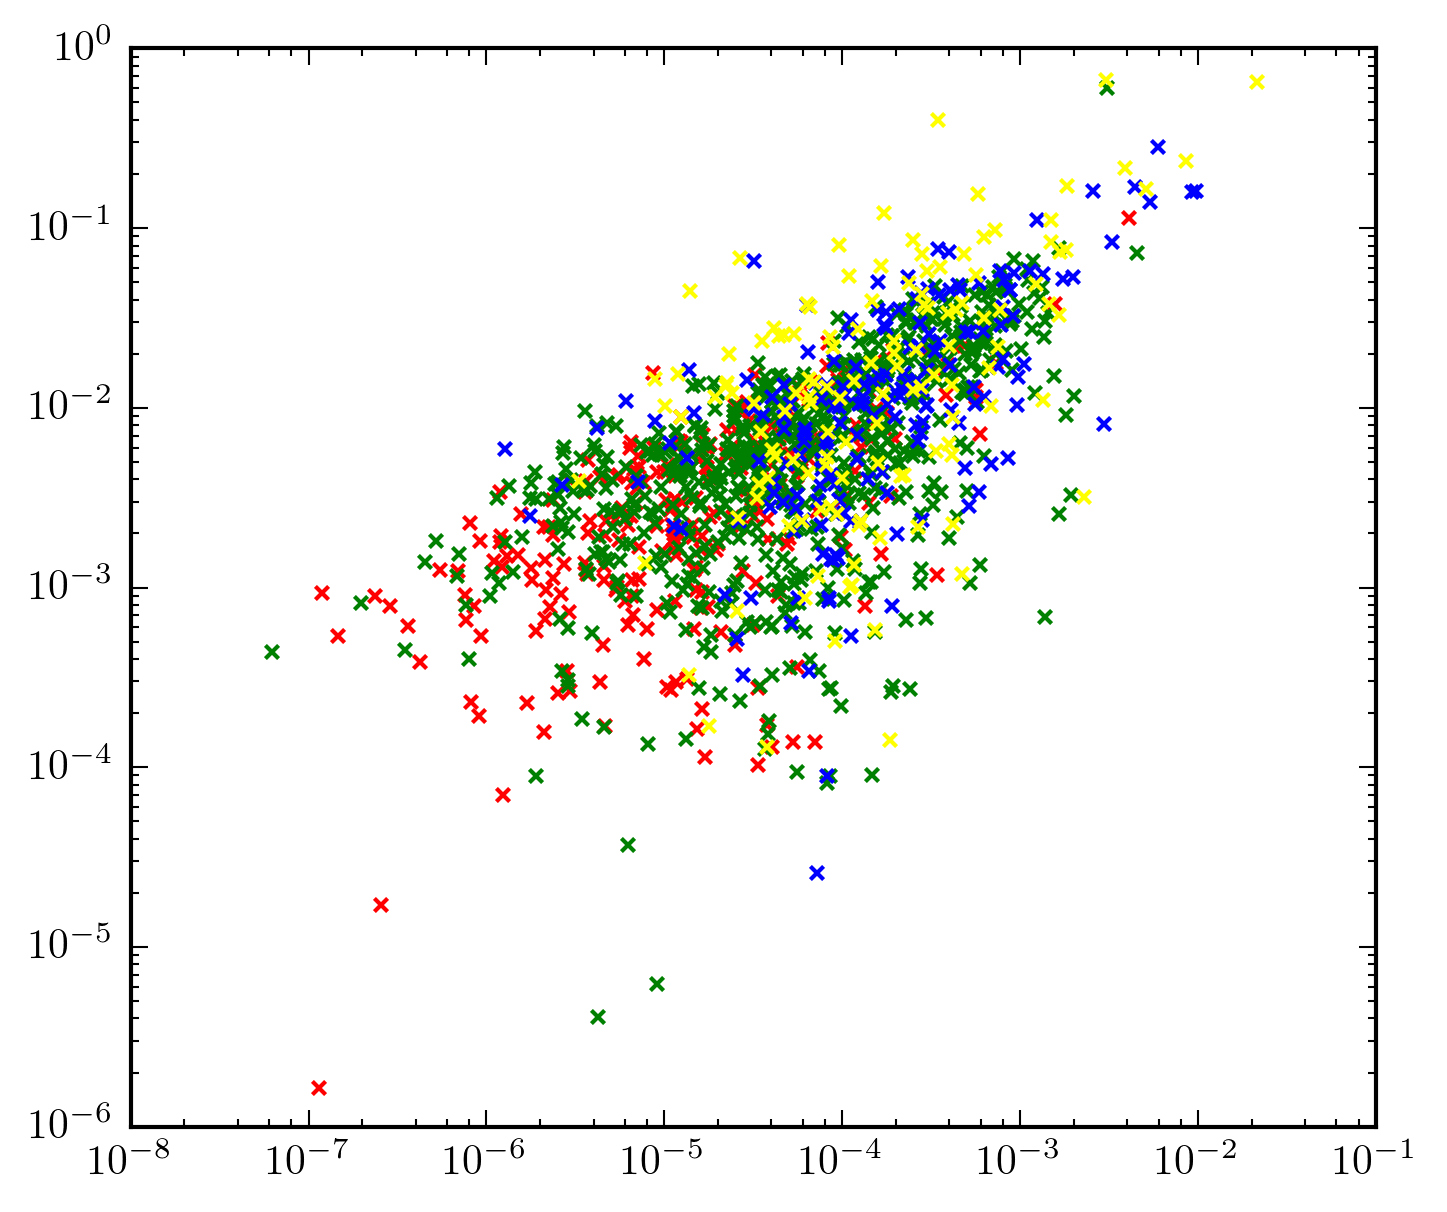

In [50]:
r_vals = [[0.0, 4e-2],[0.1-1e-2, 0.1+1e-2],[0.50-1e-3, 0.5+1e-3],[1-1e-3,1+1e-3]]
r_vals_str = [['0.0', '4e-2'],['0.1-1e-2', '0.1+1e-2'],['0.5-1e-3', '0.5+1e-3'],['1-1e-3', '1+1e-3']]

import scipy.stats as stats


f = fullfig(hf = 2.0)


ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

clr = ['r', 'g', 'b', 'yellow']
for r_counter in range(4):
        obj_func_val = []
        error = []
        slope_error = []
        
        r_low_lim = r_vals[r_counter][0]; r_high_lim = r_vals[r_counter][1] 
        norm = mpl.colors.LogNorm(vmin=r_low_lim, vmax=r_high_lim)
        
        idx_inTup = np.where((order_param >r_low_lim) & (order_param < r_high_lim)) 
        num_sol   = len(order_param[(order_param > r_low_lim) & (order_param < r_high_lim)])
        print('Number of solutions that have (order_param < {0})'.format(r_vals_str[r_counter][0]), 
              r'& (order_param > {0}):'.format(r_vals_str[r_counter][1]), num_sol)

        idx_inArr = np.zeros((num_sol, 3), dtype = int64)
        
        for i in range(num_sol):
            idx_inArr[i,0] = idx_inTup[0][i]
            idx_inArr[i,1] = idx_inTup[1][i]
            idx_inArr[i,2] = idx_inTup[2][i] 
        
        for jCounter in range(num_sol):
            i_ = idx_inArr[jCounter, 0]
            j_ = idx_inArr[jCounter, 1]
            k_ = idx_inArr[jCounter, 2]
    
            Position = np.zeros((12, 2))

            str_ = "%02d"%(i_)
            file = data_dir + '\RunPso_c{0}_s{1}_r'.format("%02d"%(25*k_), "%02d"%(175+25*j_))+str_
            fp = open(file)
    
            for j, line in enumerate(fp):
                      if(j >= 3415 and j<= 3426):
                        test = re.split(r'\t+', line)
                        Position[j-3415,0] = float(test[0])
                        Position[j-3415,1] = float(test[1])
            tiling = Position / 4  
            
            # Loop1: The bar lengths
            a11 = np.linalg.norm(tiling[1] - tiling[9])
            a21 = np.linalg.norm(tiling[1] - tiling[0])
            a31 = np.linalg.norm(tiling[0] - tiling[8])
            a41 = np.linalg.norm(tiling[8] - tiling[9])


            # Loop2: The bar lengths
            a12 = np.linalg.norm(tiling[7] - tiling[8])
            a22 = np.linalg.norm(tiling[7] - tiling[6])
            a32 = np.linalg.norm(tiling[6] - tiling[11])
            a42 = np.linalg.norm(tiling[8] - tiling[11])


            # Loop3: The bar lengths
            a13 = np.linalg.norm(tiling[11] - tiling[5])
            a23 = np.linalg.norm(tiling[5] - tiling[4])
            a33 = np.linalg.norm(tiling[4] - tiling[10])
            a43 = np.linalg.norm(tiling[10] - tiling[11])


            # Loop4: The bar lengths
            a14 = np.linalg.norm(tiling[10] - tiling[3])
            a24 = np.linalg.norm(tiling[3] - tiling[2])
            a34 = np.linalg.norm(tiling[9] - tiling[2])
            a44 = np.linalg.norm(tiling[10] - tiling[9])

            
            

            #------------------------CHANGED ON 30/03/2018-----------------------------------
            #--------------PURPOSE: TO CHECK LINEARIZED LOOP CONDITION AROUND THETA = 0------
            #---------------REPRODUCE THE FIGURE BY UNCOMMENTING THESE STATEMENTS------------
            #pos_vec_left_deformed = hlpr_fun(tiling, -np.pi/3)

            #vec1 =  pos_vec_left_deformed[0,0,:] - pos_vec_left_deformed[1,2,:]
            #vec2 =  pos_vec_left_deformed[3,3,:] - pos_vec_left_deformed[1,2,:]
            #alpha1_max = angle_between(vec2, vec1)

            #pos_vec_right_deformed = hlpr_fun(tiling, np.pi/3)
            #vec1 =  pos_vec_right_deformed[0,0,:] - pos_vec_right_deformed[1,2,:]
            #vec2 =  pos_vec_right_deformed[3,3,:] - pos_vec_right_deformed[1,2,:]
            #alpha1_min = angle_between(vec2, vec1)
            #alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180
            #---------------------------------------------------------------------------------
            
            pos_vec_deformed = hlpr_fun(tiling, 0)
            vec1 =  pos_vec_deformed[0,0,:] - pos_vec_deformed[1,2,:]
            vec2 =  pos_vec_deformed[3,3,:] - pos_vec_deformed[1,2,:]
            alpha1  = angle_between(vec2, vec1)
            alpha1_max = alpha1 + 1e-5
            alpha1_min = alpha1 - 1e-5
            alpha1 = np.linspace(alpha1_min, alpha1_max, 50)*np.pi/180
            
            
            Delta1 = angle_between(tiling[1]-tiling[9],tiling[2]-tiling[9]); Delta2 = angle_between(tiling[10]-tiling[9],tiling[8]-tiling[9])
            Delta3 = angle_between(tiling[7]-tiling[8],tiling[0]-tiling[8]); Delta4 = angle_between(tiling[9]-tiling[8],tiling[11]-tiling[8])
            Delta5 = angle_between(tiling[5]-tiling[11],tiling[6]-tiling[11]); Delta6 = angle_between(tiling[8]-tiling[11],tiling[10]-tiling[11])
            Delta7 = angle_between(tiling[3]-tiling[10],tiling[4]-tiling[10]); Delta8 = angle_between(tiling[11]-tiling[10],tiling[9]-tiling[10])

                
            slope1, intercept, r_value, p_value, std_err = stats.linregress(alpha1, mapping_func(alpha1, a11, a21, a31, a41))    
            
            alpha2  = 2*np.pi - (Delta3 + Delta4)*np.pi/180  - mapping_func(alpha1, a11, a21, a31, a41)
            #print(mapping_func(alpha1, a11, a21, a31, a41)*90/np.pi)
            slope2, intercept, r_value, p_value, std_err = stats.linregress(alpha2, mapping_func(alpha2, a12, a22, a32, a42))
            
            alpha3  = 2*np.pi - (Delta5 + Delta6)*np.pi/180  - mapping_func(alpha2, a12, a22, a32, a42)
            #print(mapping_func(alpha1, a12, a22, a32, a42)*90/np.pi)
            slope3, intercept, r_value, p_value, std_err = stats.linregress(alpha3, mapping_func(alpha3, a13, a23, a33, a43))
            
            alpha4  = 2*np.pi - (Delta7 + Delta8)*np.pi/180  - mapping_func(alpha3, a13, a23, a33, a43)
            #print(mapping_func(alpha1, a13, a23, a33, a43)*90/np.pi)
            slope4, intercept, r_value, p_value, std_err = stats.linregress(alpha4, mapping_func(alpha4, a14, a24, a34, a44))
            
            alpha1_ = 2*np.pi - (Delta1 + Delta2)*np.pi/180  - mapping_func(alpha4, a14, a24, a34, a44)
            #print(mapping_func(alpha1, a14, a24, a34, a44)*90/np.pi)
            #print(slope1*slope2*slope3*slope4)
            # remove the nans
            #alpha1  = alpha1[~np.isnan(alpha1_)]
            #alpha1_ = alpha1_[~np.isnan(alpha1_)]
            
            # rescaling..
            #alpha1 = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            #alpha1_ = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            #alpha1   = (alpha1 - alpha1.min())/ (alpha1.max() - alpha1.min())
            #alpha1_  = (alpha1_ - alpha1_.min())/ (alpha1_.max() - alpha1_.min())
            
            
            #error.append(np.linalg.norm(alpha1 - alpha1_))
            slope = slope1*slope2*slope3*slope4
            slope_error.append(np.absolute(np.linalg.norm(slope - 1)))
            obj_func_val.append(best_cost_grid[i_, j_, k_])
            
            #slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(asarray(obj_func_val)), np.log10(asarray(error)))
            #print(slope, intercept)
        
        
        #ax.scatter(asarray(obj_func_val), asarray(error), marker='x', color = clr[r_counter], s = 10 )
        ax.scatter(asarray(obj_func_val), asarray(slope_error), marker='x', color = clr[r_counter], s = 10 )
        
        

#plt.savefig(fig_save_path + r"\loop_condition_error.pdf".format(r_counter), format='pdf',bbox_inches='tight')  


In [27]:
alpha1_max

131.17804088658707

In [28]:
alpha1_min

131.17802088658706

In [47]:
asarray(slope_error)

array([  1.20666203e-02,   1.14327769e-02,   1.42574887e-04,
         3.78357714e-03,   3.92340618e-03,   2.55657922e-02,
         3.25709975e-04,   8.41313540e-02,   4.35666522e-03,
         1.39669400e-02,   2.35415722e-02,   2.19000101e-02,
         1.41123990e-02,   5.37878333e-03,   1.03159737e-03,
         2.33730986e-03,   2.56772201e-03,   2.36825572e-01,
         1.51691622e-02,   1.53422004e-02,   1.44756748e-02,
         3.48724043e-02,   1.31251181e-02,   1.05744459e-02,
         5.44328488e-03,   2.51993498e-02,   3.36272302e-02,
         1.78395694e-02,   1.67424488e-02,   3.84427536e-02,
         4.88975460e-02,   5.31449066e-03,   7.37419632e-03,
         2.16844227e-02,   4.95534407e-03,   8.79258473e-04,
         6.78537959e-02,   2.20958332e-02,   1.70454925e-02,
         3.17979711e-02,   4.04613372e-03,   1.02256542e-02,
         5.44523491e-02,   9.80025616e-02,   1.55026182e-01,
         8.89252329e-03,   3.76031336e-02,   1.37435580e-03,
         1.71020412e-01,